In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('employee_data.csv')

In [3]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [10]:
df['tenure'].unique()

array([ 5.,  2.,  3.,  4.,  7.,  6., nan, 10.,  8.])

In [95]:
df.dropna(inplace=True)
df.fillna(df.mean(), inplace=True)

C:\Users\dhyan\AppData\Local\Temp\ipykernel_11844\2820047888.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [97]:
numeric_mean = df.select_dtypes(include=['number']).mean()

# Impute missing values only for numeric columns
df.fillna(numeric_mean, inplace=True)

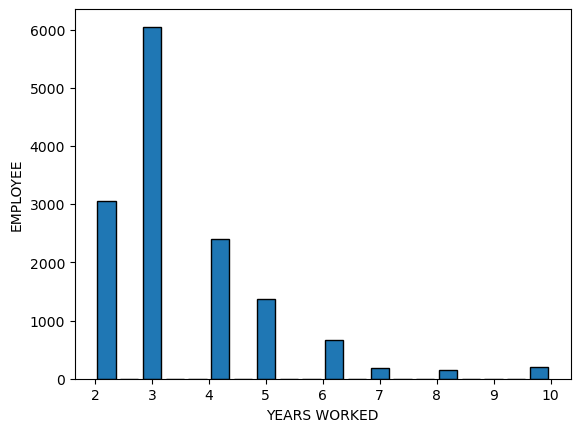

In [90]:
import matplotlib.pyplot as plt
bins=20
plt.hist(df['tenure'],bins=bins,rwidth=0.8,edgecolor='black')
plt.xlabel('YEARS WORKED')
plt.ylabel('EMPLOYEE')
plt.show()

In [28]:
category=df['status']
values=df['satisfaction']
values


0        0.829896
1        0.834544
2        0.834988
3        0.424764
4        0.779043
           ...   
14244    0.263282
14245    0.868209
14246    0.898917
14247    0.641304
14248    0.808850
Name: satisfaction, Length: 14249, dtype: float64

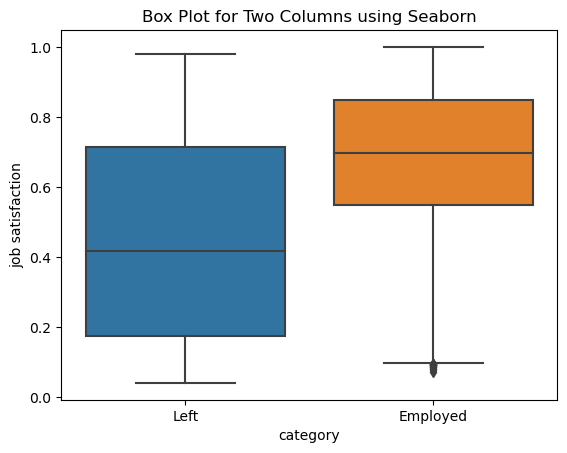

In [45]:
import seaborn as sns
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.boxplot(data=df, x='status', y='satisfaction')
plt.xlabel('Employment Status')
plt.ylabel('Job Satisfaction')
plt.title('Distribution of Job Satisfaction Scores by Employment Status')
plt.show()

In [51]:
count= df['status'].value_counts()
count


Employed    10857
Left         3392
Name: status, dtype: int64

([<matplotlib.patches.Wedge at 0x1bba998a640>,
 [Text(-0.8064592186333274, 0.7480798945843441, 'Employed'),
  Text(0.8064592536534737, -0.7480798568312627, 'Left')],
 [Text(-0.43988684652726945, 0.40804357886418763, '76.2%'),
  Text(0.4398868656291674, -0.4080435582715978, '23.8%')])

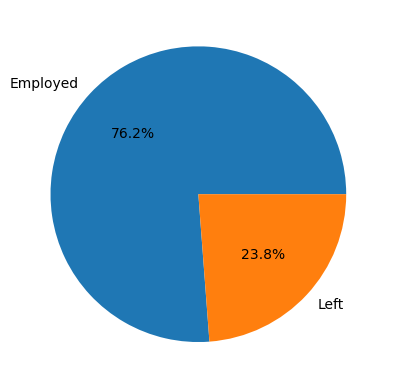

In [63]:
plt.pie(count,labels=count.index,autopct='%1.1f%%')

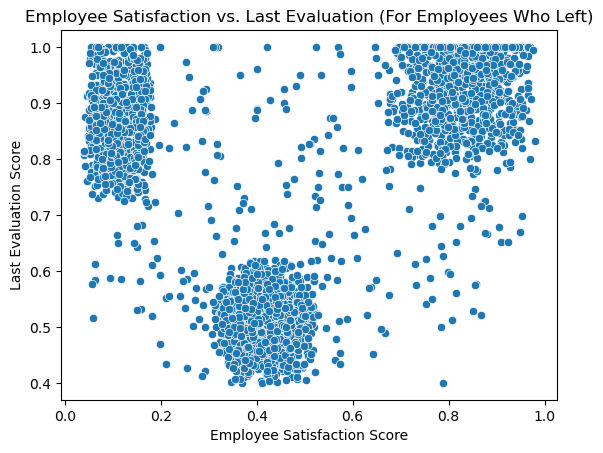

In [64]:
left_employees = df[df['status'] == 'Left']
sns.scatterplot(data=left_employees, x='satisfaction', y='last_evaluation')
plt.xlabel('Employee Satisfaction Score')
plt.ylabel('Last Evaluation Score')
plt.title('Employee Satisfaction vs. Last Evaluation (For Employees Who Left)')
plt.show()

In [66]:
correlation = df['satisfaction'].corr(df['last_evaluation'])
correlation


0.0891894924583285

In [67]:
correlation = left_employees['satisfaction'].corr(left_employees['last_evaluation'])
correlation

0.17876571627489676

#no correlation

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
X = df[['tenure','satisfaction', 'n_projects']]
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
     

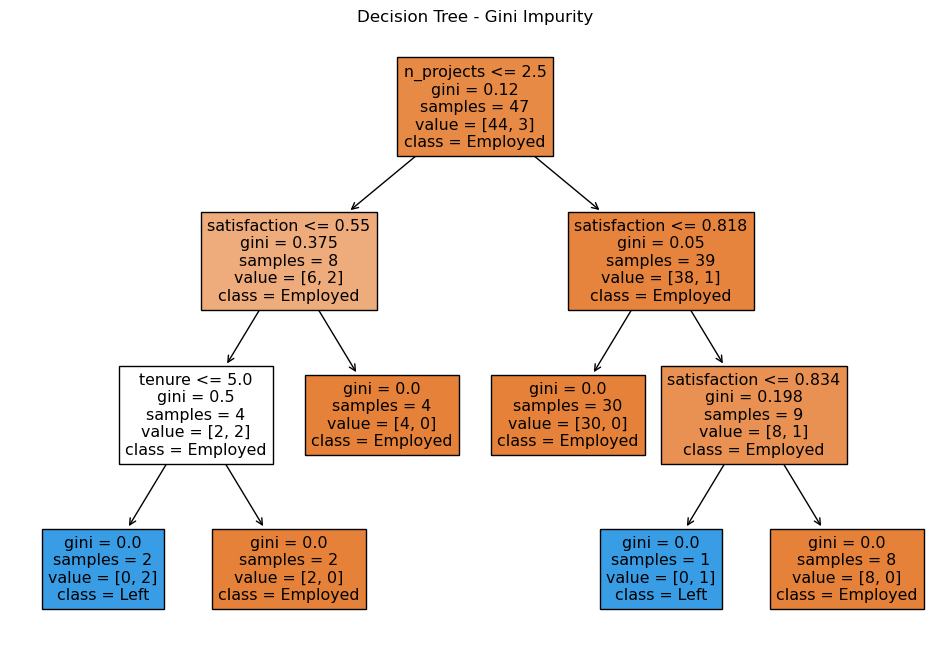

In [101]:
clf_gini = DecisionTreeClassifier(criterion='gini')

clf_gini.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=['Employed','Left'])
plt.title('Decision Tree - Gini Impurity')
plt.show()

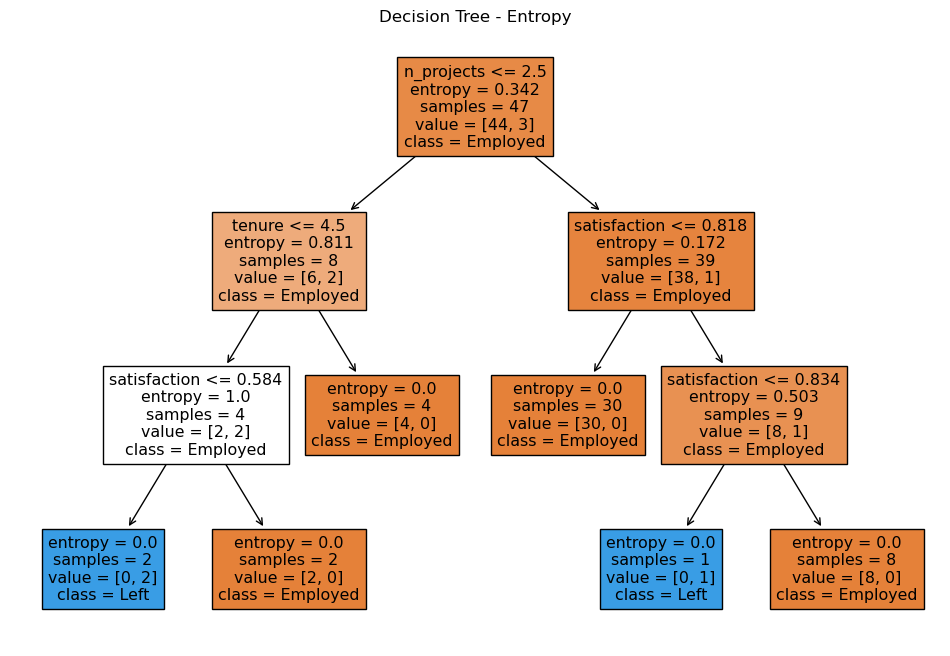

In [102]:
clf_entropy = DecisionTreeClassifier(criterion='entropy')

clf_entropy.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=['Employed','Left'])
plt.title('Decision Tree - Entropy')
plt.show()
     

In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def evaluate_model(clf, X_test, y_test):
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, pos_label='Left')
  recall = recall_score(y_test, y_pred, pos_label='Left')
  f1 = f1_score(y_test, y_pred, pos_label='Left')
  cm = confusion_matrix(y_test, y_pred, labels=['Employed', 'Left'])
  return accuracy, precision, recall, f1, cm

accuracy_gini, precision_gini, recall_gini, f1_gini, cm_gini = evaluate_model(clf_gini, X_test, y_test)
accuracy_entropy, precision_entorpy, recall_entropy, f1_entropy, cm_entropy = evaluate_model(clf_entropy, X_test, y_test)

In [106]:
print("Model Evaluation - Gini Impurity")
print(f"Accuracy: {accuracy_gini:.2f}")
print(f"Precision: {precision_gini:.2f}")
print(f"Recall: {recall_gini:.2f}")
print(f"F1 Score: {f1_gini:.2f}")
print(f"Confusion Matrix: ")
print(cm_gini)

Model Evaluation - Gini Impurity
Accuracy: 0.92
Precision: 0.50
Recall: 1.00
F1 Score: 0.67
Confusion Matrix: 
[[10  1]
 [ 0  1]]


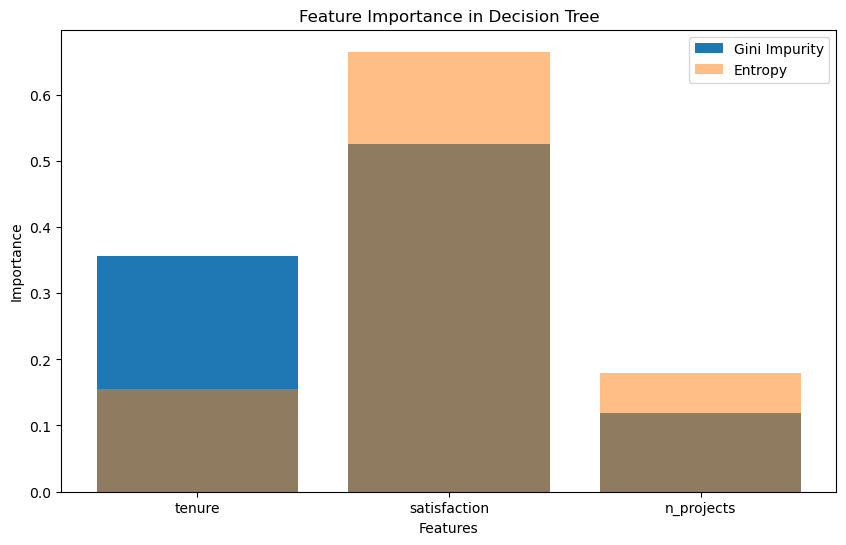

In [107]:

feature_importance_gini = clf_gini.feature_importances_

feature_importance_entropy = clf_entropy.feature_importances_

plt.figure(figsize=(10,6))
plt.bar(X.columns, feature_importance_gini, label='Gini Impurity')
plt.bar(X.columns, feature_importance_entropy, label='Entropy', alpha=0.5)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.legend()
plt.show()